# "NEW Notes on Convexity of Loss Functions for Classification"
- description:  Following up on a question that arose in Week 3 of Andrew Ng's Machine Learning course.
- toc: true
- branch: master
- badges: true
- hide: false
- comments: true
- metadata_key1: metadata_value1
- metadata_key2: metadata_value2
- image: images/convexity/convexity_header_new.jpg

This is a post where I'm investigating [convexity](https://en.wikipedia.org/wiki/Convex_function) a bit, as it relates to neural networks.

Andrew Ng, in Week 3 of his [Coursera course on Machine Learning](https://www.coursera.org/learn/machine-learning/home/welcome), shows the following image with respect to the "cost function" to be optimized:

Andrew Ng, in Week 3 of his [Coursera course on Machine Learning](https://www.coursera.org/learn/machine-learning/home/welcome), shows the following image with respect to the "cost function" to be optimized (as slide 14 of Lecture 6):

> (image is giving problems, sorry)

I wanted to investigate this: Could I reproduce the two graphs he sketched?   The two different loss functions are the mean squared error (MSE or sometimes just SE) and cross entropy (CE):

$$ MSE = {1\over m}\sum_{i=1}^m \left( y_i - h_i \right)^2 $$

$$ CE =  - {1\over m}\sum_{i=1}^m \left[ y_i \log(h_i) + (1-y_i) \log(1-h_i) \right] $$

where $y_i$ are the true values (0 or 1) and $h_i = h(x_i)$ are the predictions. 

**TL/DR: No I can't reproduce his sketches.  The graph I get for sum of the squared error (SE) doesn't have the wiggles that his drawing on the left does. *(Perhaps he was just doodling an example of an arbitrary non-convex function, rather than the squared loss in particular?)*   Takeways at the bottom of this, re. the difference between a convex *loss function (by itself)* vs. a convex loss for a *problem* -- i.e. the individual terms are convex for either function, but the *sum* of these terms is actually not strictly convex for either function (for this problem).**

I read a few posts about this first...
* [Math StackExchange: Show that logistic regression with squared loss function is non-convex](https://math.stackexchange.com/questions/1985008/show-that-logistic-regression-with-squared-loss-function-is-non-convex/2176466), which includes a link to [this nice demo on Desmos](https://www.desmos.com/calculator/kxz6lzszf9)
* https://math.stackexchange.com/questions/2193478/loss-function-for-logistic-regression
* https://en.wikipedia.org/wiki/Loss_functions_for_classification seems to say that squared loss is convex. ?? 

...but then wanted to try for myself.  As follows:

In [1]:
# preliminary set up. ipympl allows for interactive plots; replace it with inline if not working
#%matplotlib ipympl
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

In [2]:
# basic functions for data operations
def h(x,a,b):                            # h = logistic function.  a is 'weight' and b is 'bias'
    return 1/(1 + np.exp(-(a*x + b)))    # For code below, a & b should be scalars, x can be anything

def classify_x(x, threshold):   
    out = 0*x
    out[x > threshold] = 1.0
    return out

Prediction guess: a = 23.999999999999982 , b = -17.55359999999999


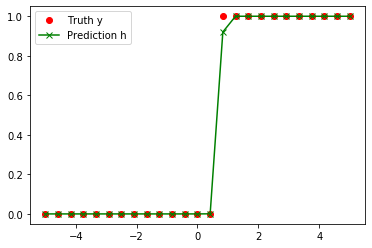

In [3]:
# define some data
num_x = 25
x_arr = np.linspace(-5,5,num_x)          # _arr denotes"array" 
threshold = 0.7314                       # threshold value chosen arbitrarily
y_arr = classify_x(x_arr, threshold)

# make a prediction
a_guess = 10/(x_arr[1]-x_arr[0])
b_guess = -a_guess * threshold
print("Prediction guess: a =",a_guess,", b =",b_guess)
h_arr = np.array(h(x_arr, a_guess, b_guess))

# plot the data
fig = plt.figure()
plt.plot(x_arr, y_arr,'o',color='red',label="Truth y")
plt.plot(x_arr, h_arr,'x-',color='green',label="Prediction h")
plt.legend()
plt.show()